# Exploratory Data Analysis (EDA)

## Table of Contents

1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [154]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame


In [155]:

# !ls ../1_DatasetCharacteristics

## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [156]:
df = pd.read_csv('../1_DatasetCharacteristics/share_w6_retirees.csv')

# df = pd.read_csv('share_w6_retirees.csv')

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())


Number of samples: 1394
Number of features: 127
Example data:
        mergeid        hhid6     mergeidp6        coupleid6  country  \
0  AT-022659-01  AT-022659-A  AT-022659-02  AT-022659-01-02       11   
1  AT-022659-02  AT-022659-A  AT-022659-01  AT-022659-01-02       11   
2  AT-022738-03  AT-022738-A  AT-022738-01  AT-022738-01-03       11   
3  AT-058892-03  AT-058892-A  AT-058892-02  AT-058892-02-03       11   
4  AT-059781-01  AT-059781-A  AT-059781-02  AT-059781-01-02       11   

   language  ac011__1  ac012__1  ac014__1  ac015__1  ac016__1  ac017__1  \
0        11       1.0       8.0       3.0       3.0       4.0       1.0   
1        11       1.0       9.0       2.0       3.0       4.0       2.0   
2        11       1.0       9.0       4.0       4.0       4.0       1.0   
3        11       1.0      10.0       4.0       4.0       4.0       1.0   
4        11       1.0      10.0       4.0       3.0       4.0       1.0   

   ac018__1  ac019__1  ac020__1  ac021__1  ac022__1  a

In [157]:
object_cols = df.select_dtypes(include='object')

In [158]:
df.drop(columns=object_cols.columns, inplace=True) # removing object columns because they are not useful for numerical analysis

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [159]:
missing_values = df.isnull().sum() # Check for missing values
missing_values.sum()

np.int64(4490)

In [160]:
df = df.loc[:, df.isnull().mean() < 0.5] # Drop columns with more than 50% missing values

In [161]:
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median()) # Impute numerical columns with median

In [162]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0]) # Impute categorical columns with mode value

In [163]:
missing_values = df.isnull().sum()
missing_values.sum()

np.int64(0)

In [164]:
df.shape

(1394, 123)

In [165]:
y = df['ep036__7']
X = df.drop(columns=['ep036__7'])

## Feature Distributions


In [166]:
df.head()

,country,language,ac011__1,ac012__1,ac014__1,ac015__1,ac016__1,ac017__1,ac018__1,ac019__1,ac020__1,ac021__1,ac022__1,ac023__1,ac024__1,ac025__1,ac035d1_1,ac035d4_1,ac035d5_1,ac035d7_1,ac035d8_1,ac035d9_1,ac035d10_1,ac035dno_1,ac037__1,exrate_2,br015__3,br016__3,br039__3,co211__5,dn036__6,dn037__6,dn042__6,dn044__6,ep007__7,ep009__7,ep013__7,ep026__7,ep027__7,ep028__7,ep029__7,ep030__7,ep031__7,ep032__7,ep033__7,ep034__7,ep035__7,ep036__7,ep037__7,ep097__7,ep098d1_7,ep098d4_7,ep141d1_7,ep141d2_7,ep141d3_7,ep141d4_7,ep141d5_7,ep141dno_7,ep204__7,ep206__7,gs004__8,gs006__8,gs007__8,gs008__8,gs009__8,it001__10,it003__10,mh002__11,mh004__11,mh007__11,mh013__11,mh034__11,mh037__11,ph003__12,ph004__12,ph005__12,ph006d1_12,ph006d2_12,ph006d3_12,ph006d4_12,ph006d5_12,ph006d6_12,ph006d10_12,ph006d11_12,ph006d12_12,ph006d13_12,ph006d14_12,ph006d15_12,ph006d16_12,ph006d18_12,ph006d19_12,ph006d20_12,ph006d21_12,ph006dno_12,ph006dot_12,ph011d1_12,ph011d2_12,ph011d3_12,ph011d4_12,ph011d6_12,ph011d7_12,ph011d8_12,ph011d9_12,ph011d10_12,ph011d11_12,ph011d13_12,ph011d14_12,ph011d15_12,ph011dno_12,ph011dot_12,ph046__12,ph061__12,ph084__12,ep064d1_7_w9,ep064d2_7_w9,ep064d3_7_w9,ep064d4_7_w9,ep064d5_7_w9,ep064d6_7_w9,ep064d7_7_w9,ep064d8_7_w9,ep064d9_7_w9,ep064d10_7_w9
0,11,11,1.0,8.0,3.0,3.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,8.0,1.0,2.0,1.0,1.0,5.0,1.0,1.0,1,5.0,5.0,1.0,39.0,2.0,3.0,3.0,4.0,4.0,2.0,3.0,3.0,2.0,4.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,3.0,48.0,41.0,37.0,41.0,1.0,3.0,5.0,2.0,2.0,5.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11,11,1.0,9.0,2.0,3.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0,4.0,3.0,5.0,5.0,1.0,2.0,2,5.0,5.0,2.0,55.0,1.0,4.0,3.0,4.0,2.0,1.0,2.0,2.0,1.0,4.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,24.0,26.0,27.0,25.0,1.0,2.0,5.0,2.0,2.0,5.0,3.0,3.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,11,1.0,9.0,4.0,4.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0,1.0,1.0,1.0,1.0,5.0,1.0,2.0,1,5.0,5.0,2.0,38.0,1.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,56.0,57.0,58.0,60.0,1.0,2.0,5.0,2.0,2.0,5.0,3.0,3.0,2.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,11,1.0,10.0,4.0,4.0,4.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,1.0,2.0,1.0,1.0,5.0,2.0,2.0,1,5.0,5.0,1.0,45.0,2.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,42.0,43.0,51.0,57.0,1.0,3.0,5.0,2.0,2.0,5.0,3.0,3.0,3.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,11,1.0,10.0,4.0,3.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,10.0,1.0,3.0,1.0,5.0,5.0,0.0,1.0,2,5.0,5.0,1.0,39.0,2.0,3.0,3.0,1.0,4.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,24.0,21.0,27.0,26.0,5.0,4.0,5.0,2.0,2.0,5.0,3.0,3.0,2.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
df.columns

Index(['country', 'language', 'ac011__1', 'ac012__1', 'ac014__1', 'ac015__1',
       'ac016__1', 'ac017__1', 'ac018__1', 'ac019__1',
       ...
       'ep064d1_7_w9', 'ep064d2_7_w9', 'ep064d3_7_w9', 'ep064d4_7_w9',
       'ep064d5_7_w9', 'ep064d6_7_w9', 'ep064d7_7_w9', 'ep064d8_7_w9',
       'ep064d9_7_w9', 'ep064d10_7_w9'],
      dtype='object', length=123)

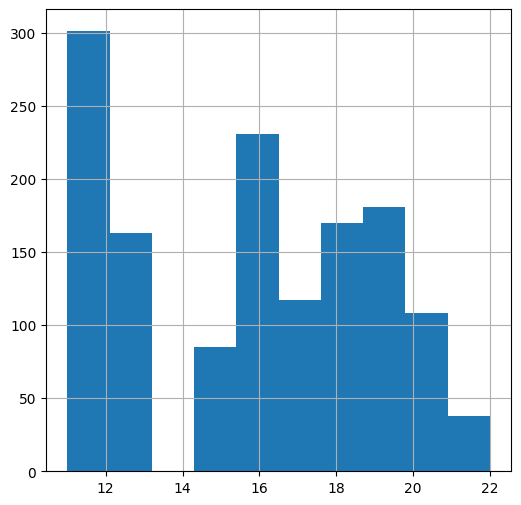

In [168]:
# Example: Plotting histograms of all numerical features
df.language.hist(figsize=(6, 6))
plt.show()


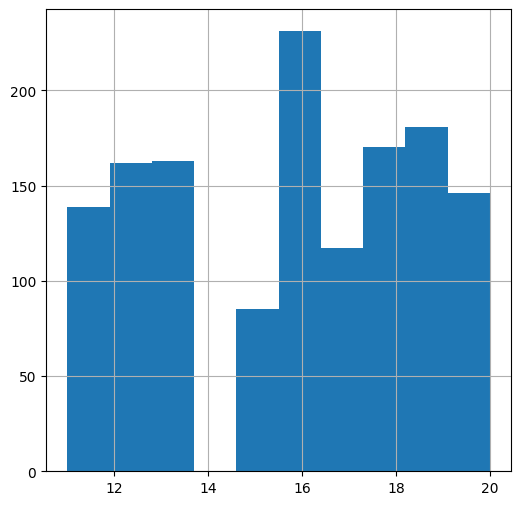

In [169]:
# Example: Plotting histograms of all numerical features
df.country.hist(figsize=(6, 6))
plt.show()

/tmp/ipykernel_57838/2719729277.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue=target, common_norm=False, fill=True)


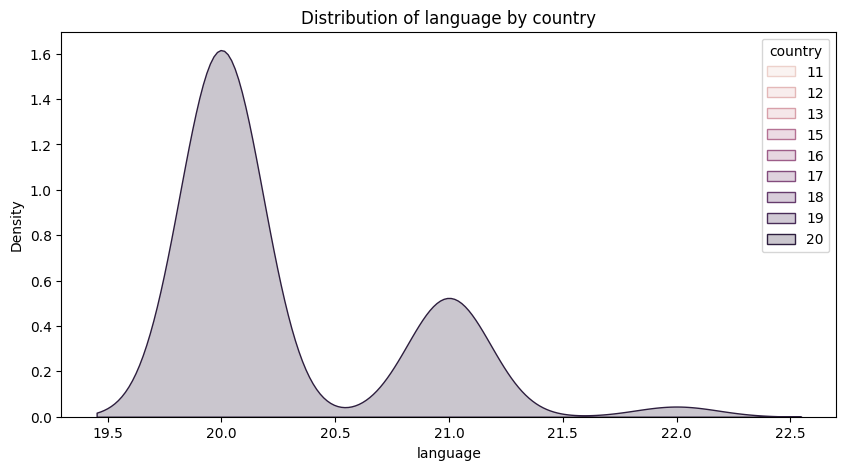

In [170]:
def plot_feature_distribution(df, feature, target):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=feature, hue=target, common_norm=False, fill=True)
    plt.title(f'Distribution of {feature} by {target}')
    plt.show()

plot_feature_distribution(df, 'language', 'country')

## Possible Biases

#### Performing Feature Selection (Random Forest Importance)


In [171]:
target = df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 5, 10, 15, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['auto', 'sqrt', 'log2']
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # cross-validation


grid_search = GridSearchCV(  # GridSearchCV for tuning
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_.named_steps['clf']

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/metaphysicist/Coding/2025/opencampus/Aging/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/metaphysicist/Coding/2025/op

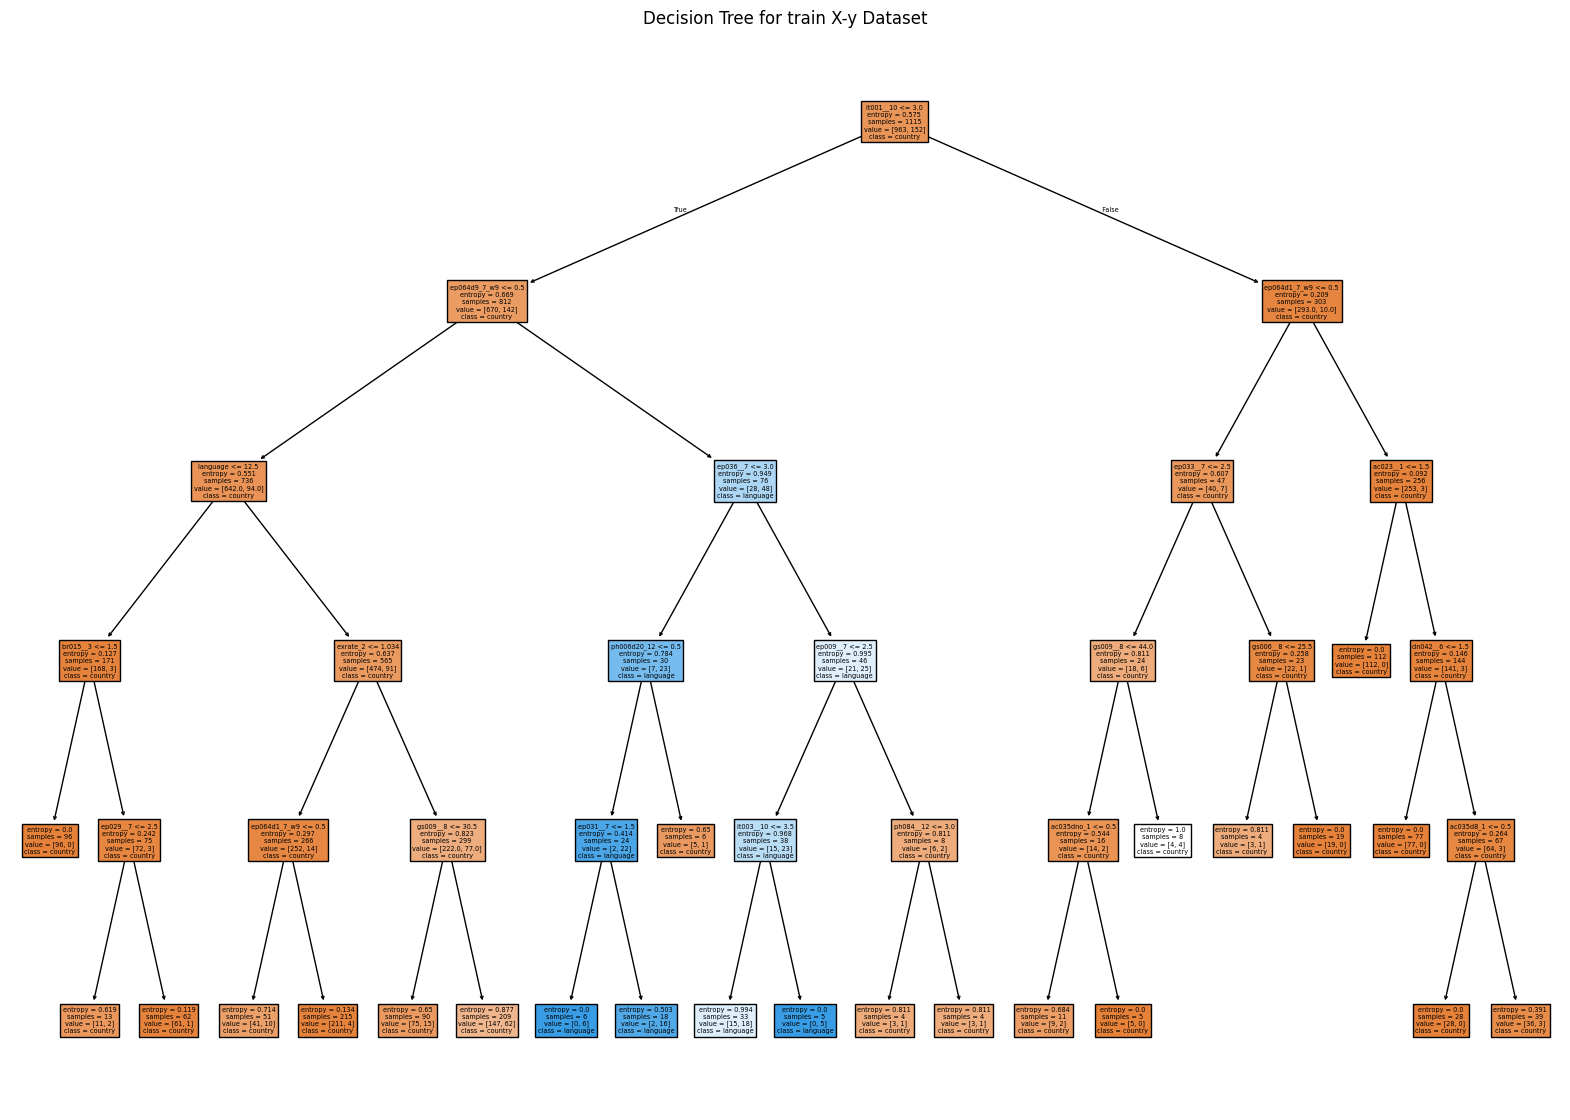

<Figure size 640x480 with 0 Axes>

In [173]:
plt.figure(figsize=(20, 14))
plot_tree(best_model, feature_names=X_train.columns, class_names=X_train.columns, filled=True)
plt.title("Decision Tree for train X-y Dataset")
plt.show()
plt.savefig('docs/decision_tree.png')

In [174]:
tree_rules = export_text(best_model, feature_names=list(X_train.columns))

# Save to a text file
with open("docs/decision_tree_rules.txt", "w") as f:
    f.write(tree_rules)

In [187]:
importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
sorted_importances = importances[importances>0.01].sort_values(ascending=False)

print(len(sorted_importances))
# print("Top 20 Important Features:")
print(top_features)

17
exrate_2        0.066389
ep064d9_7_w9    0.061666
ep064d1_7_w9    0.056722
gs007__8        0.030398
ep098d4_7       0.027214
gs006__8        0.026946
gs009__8        0.026866
ep013__7        0.025342
gs008__8        0.024951
language        0.022902
country         0.021876
ph046__12       0.017621
ph003__12       0.016273
ac012__1        0.014267
it003__10       0.013863
ep026__7        0.013763
ep033__7        0.013436
ac018__1        0.012858
ac015__1        0.012515
ep028__7        0.012336
dtype: float64


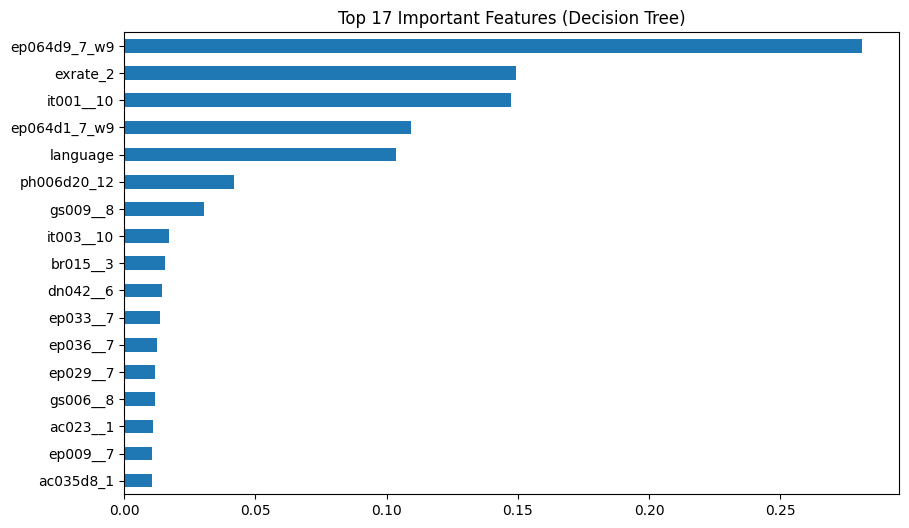

In [188]:
top_n = 17  # I have decided to use top 18 features for our analysis based on elbow/visual inspection
plt.figure(figsize=(10, 6))
sorted_importances[:top_n].plot(kind='barh')
plt.title(f"Top {top_n} Important Features (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()

In [189]:
selected_features = sorted_importances.head(17).index.tolist()

In [190]:
X_reduced = X_train[selected_features]

In [191]:
X_reduced

,ep064d9_7_w9,exrate_2,it001__10,ep064d1_7_w9,language,ph006d20_12,gs009__8,it003__10,br015__3,dn042__6,ep033__7,ep036__7,ep029__7,gs006__8,ac023__1,ep009__7,ac035d8_1
176,0.0,1.0679,1.0,0.0,20,0.0,45.0,4.0,2.0,1,2.0,5.0,4.0,48.0,1.0,3.0,1.0
251,0.0,1.0679,1.0,0.0,20,0.0,66.0,4.0,2.0,1,2.0,5.0,4.0,62.0,1.0,1.0,1.0
761,0.0,1.0000,1.0,1.0,17,0.0,33.0,4.0,1.0,1,3.0,1.0,3.0,30.0,3.0,1.0,0.0
755,0.0,1.0000,1.0,0.0,17,0.0,49.0,4.0,2.0,2,2.0,1.0,1.0,44.0,3.0,1.0,1.0
730,0.0,1.0000,5.0,0.0,17,1.0,22.0,4.0,2.0,2,1.0,1.0,3.0,21.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.0,1.0000,5.0,1.0,11,0.0,56.0,6.0,1.0,1,3.0,5.0,2.0,48.0,3.0,1.0,1.0
446,0.0,1.0000,1.0,0.0,12,0.0,45.0,4.0,2.0,1,1.0,1.0,4.0,45.0,2.0,1.0,0.0
1062,0.0,1.0000,1.0,1.0,16,1.0,28.0,6.0,4.0,2,2.0,1.0,3.0,25.0,2.0,2.0,1.0
353,1.0,1.0000,5.0,1.0,12,0.0,41.0,5.0,1.0,2,4.0,1.0,2.0,35.0,2.0,2.0,1.0


In [ ]:
sns.countplot(x='ph006dno_12', data=df) # Checking for class imbalance


ValueError: Could not interpret value `ph006dno_12` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='ep036__7', ylabel='count'>

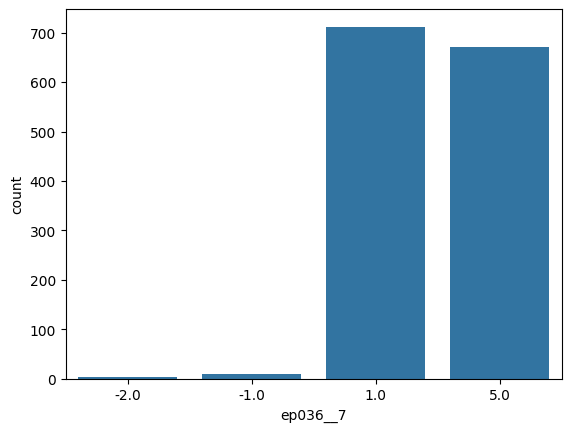

In [181]:
sns.countplot(x='ep036__7', data=df) # Checking for target class imbalance 


In [194]:
X_reduced = X_reduced.replace({-2.0: -1.0}) # 

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


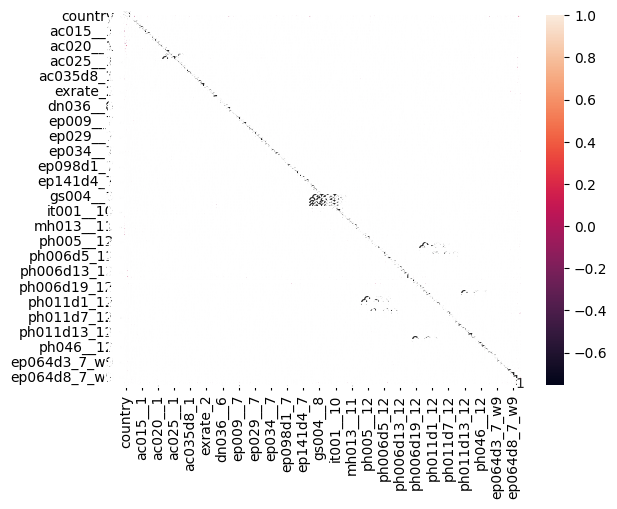

In [196]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()
